[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/NLP/blob/master/Part_6-Deep-Learning/Chapter_23_Keras/Keras_imbd_1_Dense_Sequential.ipynb)

###### Code accompanies *Natural Language Processing* by KJG Mazidi, all rights reserved.

### Movie Reviews

This notebook code is taken from Francois Challot's book *Deep Learning with Python*, published by Manning, and available [on Amazon](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_fkmr0_1?keywords=deep+learning+python+challot&qid=1573571371&sr=8-1-fkmr0). You can see the orignal notebook [on the book's GitHub](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb)

This notebook uses the IMDB movie data set that is built-in with Keras. The first time you load the data, it will be automatically downloaded to your machine for future use.


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

In [3]:
# Check tf version for this notebook

tf.__version__

'2.3.0'

In [4]:
print('Size of training and test data:', train_labels.shape, test_labels.shape)

Size of training and test data: (25000,) (25000,)


In [5]:
# prepare data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [6]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# build the model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# train

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5407 - accuracy: 0.7733 - val_loss: 0.4134 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3273 - accuracy: 0.8982 - val_loss: 0.3179 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2375 - accuracy: 0.9223 - val_loss: 0.2969 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1863 - accuracy: 0.9400 - val_loss: 0.2729 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1505 - accuracy: 0.9509 - val_loss: 0.2751 - val_accuracy: 0.8909
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1243 - accuracy: 0.9606 - val_loss: 0.2975 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1030 - accuracy: 0.9687 - val_loss: 0.3127 - val_accuracy: 0.8837
Epoch 8/20
30

In [11]:
# use sklearn evaluation

from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     12500
         1.0       0.85      0.86      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [12]:
# use tf evaluation method

losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
losses_and_metrics

196/196 [==============================] - 1s 4ms/step - loss: 0.7656 - accuracy: 0.8521


[0.7656248211860657, 0.8521199822425842]

In [13]:
# to extract predictions, use this code

classes = model.predict(x_test, batch_size=128)
classes[:5]

array([[0.00408164],
       [0.9999995 ],
       [0.98852015],
       [0.9976957 ],
       [0.9987214 ]], dtype=float32)

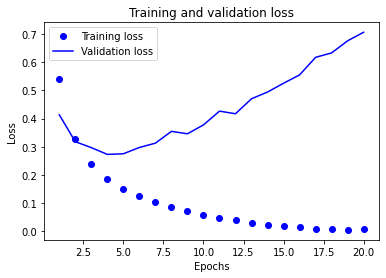

In [14]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The plot above shows that although the training loss decreased with every epoch, the validation set loss started increasing after about 4 epochs. This shows that the model was overtrained.

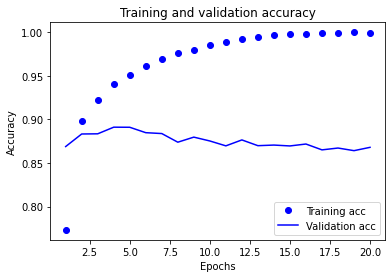

In [15]:
# plot the training and validation accuracy

plt.clf()   # clear

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Similarly, the accuracy plot above shows that training accuracy continued to improve over many epochs but validation accuracy decreased after about 4 epochs.

Next, the model is fit again but adds an early stopping condition. The accuracy results went up by 1 point and the training was faster. 


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # min change in metrics
    patience=4,     # min epochs 
    restore_best_weights=True,
)

In [17]:
# fit the model again with early stopping

model.fit(x_train, y_train, callbacks=[early_stopping], batch_size=512)
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4691 - accuracy: 0.8550


In [18]:
# model.evaluate() results give the loss and metrics (accuracy in this example)
results

[0.4691176414489746, 0.8550000190734863]

In [19]:
pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     12500
         1.0       0.84      0.88      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [20]:
# check the pos/neg distribution
# the set is 50/50

pos = sum(y_test[y_test>0]) / len(y_test)
pos

0.5